# Machine Learning - Homework 4
##### Author: Shivani Tayade, Sravya Bhaskara

### Linear Regression with PyTorch on the Auto MPG Dataset 

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load dataset
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Figure size 1200x800 with 0 Axes>

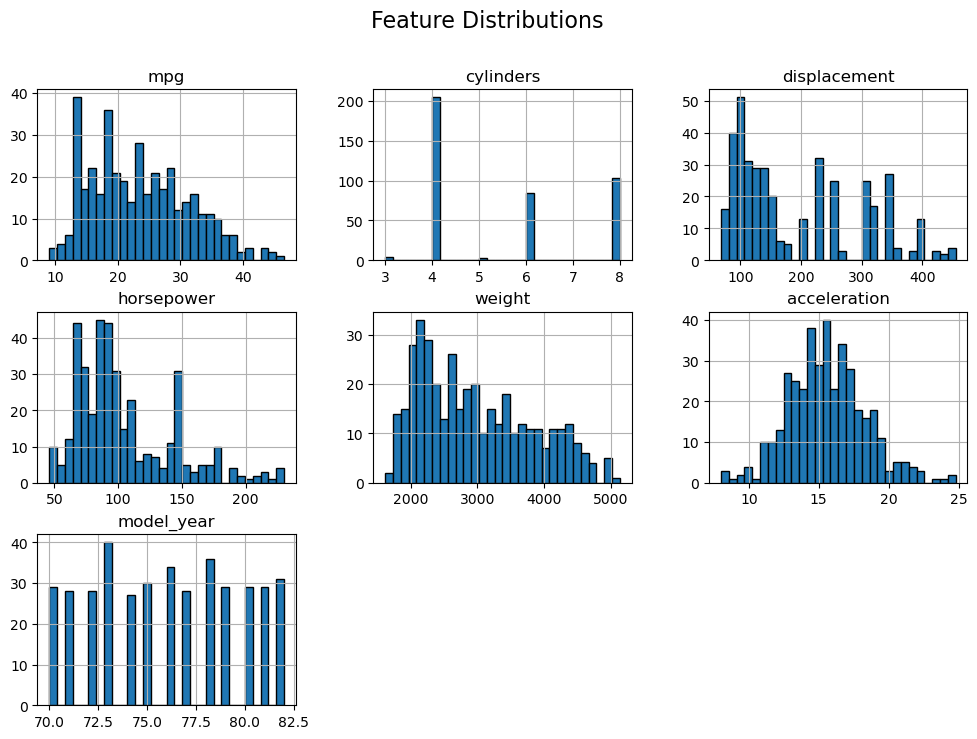

In [6]:
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [7]:
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are null values in the data for variable horsepower 
$$\boxed {\text{\ \ }} $$


In [9]:
# Drop rows with missing values
df_drop = df.dropna()
print("Shape after dropping missing values:", df_drop.shape)


Shape after dropping missing values: (392, 9)


In [10]:
# Approach 2: Impute missing values
# For numerical columns, we can impute using the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed = df.copy()
for col in numerical_cols:
    if df_imputed[col].isnull().sum() > 0:
        mean_value = df_imputed[col].mean()
        df_imputed[col].fillna(mean_value, inplace=True)


In [11]:

# For categorical columns, we might choose the mode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if df_imputed[col].isnull().sum() > 0:
        mode_value = df_imputed[col].mode()[0]
        df_imputed[col].fillna(mode_value, inplace=True)

print("Missing values after imputation:")
print(df_imputed.isnull().sum())

Missing values after imputation:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [12]:
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [13]:
df_imputed['horsepower'].describe()

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [14]:
df_imputed1 = df_imputed.drop(columns=['name','origin','model_year'])
df_imputed1 

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [15]:
df_imputed1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000


 As many of the vairables are highly corelated, we can either scale it and standardrize, to reduce the multicollinearity.
 I analyzed the correlation matrix and noticed that weight has a very strong negative correlation with mpg (–0.83), making it a primary predictor of fuel efficiency. Although acceleration has a lower correlation (0.42) with mpg, it provides complementary information that isn’t redundant with weight. Since other features like cylinders, displacement, and horsepower are highly correlated with weight, including them would introduce multicollinearity without significantly improving the model. Thus, I chose weight and acceleration as the predictors to maintain simplicity while retaining strong predictive power.


### Dropping the variables and training the Model basis Corelation

In [18]:
# Define the target and features

target = df_imputed['mpg']
features = df_imputed[['weight', 'acceleration','origin']]
# One-hot encode the categorical 'origin' feature
features = pd.get_dummies(features, columns=['origin'], drop_first=True)

print("Features after encoding:")
print(features.head())


Features after encoding:
   weight  acceleration  origin_japan  origin_usa
0    3504          12.0         False        True
1    3693          11.5         False        True
2    3436          11.0         False        True
3    3433          12.0         False        True
4    3449          10.5         False        True


In [19]:
# Optionally, standardize the features
scaler = StandardScaler()
features[['weight', 'acceleration']] = scaler.fit_transform(features[['weight', 'acceleration']])

print("Features after preprocessing:")
print(features.head())

Features after preprocessing:
     weight  acceleration  origin_japan  origin_usa
0  0.630870     -1.295498         False        True
1  0.854333     -1.477038         False        True
2  0.550470     -1.658577         False        True
3  0.546923     -1.295498         False        True
4  0.565841     -1.840117         False        True


In [20]:
# Define the target variable and the features
target = df_imputed['mpg']  

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.20, random_state=42, shuffle=True
)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (318, 4) (318,)
Test set shape: (80, 4) (80,)


# Model Implementation

In [22]:
#pip install torch

In [23]:
#!pip install torch torchvision torchaudio


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np



In [25]:
# Define a simple linear regression model with one fully-connected layer
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single linear layer for predicting mpg
        
    def forward(self, x):
        out = self.linear(x)
        return out

# Initialize the model; input_dim is the number of features in X_train
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Utility function to initialize weights and biases using Xavier initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.0)

model.apply(init_weights)

# Print model architecture and number of trainable parameters
print("Model architecture:")
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total trainable parameters:", total_params)



Model architecture:
LinearRegressionModel(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)
Total trainable parameters: 5


In [26]:
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Set the learning rate for our manual SGD
learning_rate = 0.01



In [27]:
X_train_tensor = torch.tensor(X_train.to_numpy().astype(np.float32))
y_train_tensor = torch.tensor(y_train.to_numpy().astype(np.float32)).reshape(-1, 1)

print("X_train_tensor dtype:", X_train_tensor.dtype)
print("y_train_tensor shape:", y_train_tensor.shape)

X_train_tensor dtype: torch.float32
y_train_tensor shape: torch.Size([318, 1])


In [28]:
# Number of epochs for training
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    
    # Forward pass: compute predicted mpg
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Manually update parameters using SGD
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    
    # Zero the gradients after updating
    model.zero_grad()
    
    # Store and print the loss for monitoring
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete!")


Epoch [10/100], Loss: 401.6545
Epoch [20/100], Loss: 244.2771
Epoch [30/100], Loss: 153.9754
Epoch [40/100], Loss: 101.8332
Epoch [50/100], Loss: 71.4895
Epoch [60/100], Loss: 53.6577
Epoch [70/100], Loss: 43.0479
Epoch [80/100], Loss: 36.6347
Epoch [90/100], Loss: 32.6801
Epoch [100/100], Loss: 30.1804
Training complete!


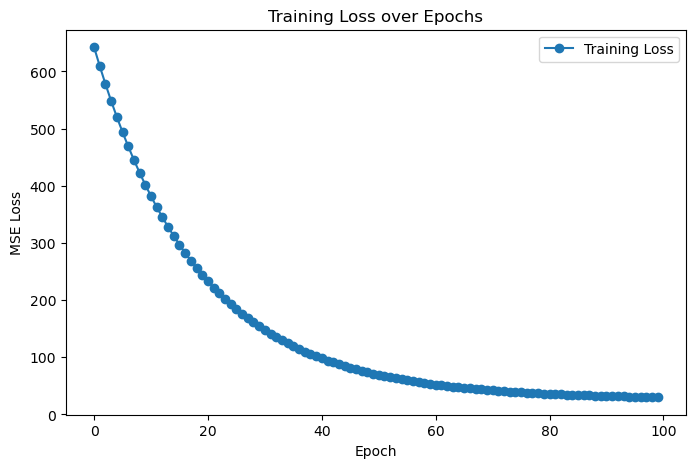

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()


In [30]:
# Convert test features and target into PyTorch tensors
X_test_tensor = torch.tensor(X_test.to_numpy().astype(np.float32))
y_test_tensor = torch.tensor(y_test.to_numpy().astype(np.float32)).reshape(-1, 1)


In [31]:
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    predictions = model(X_test_tensor)


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Convert predictions and true values from tensors to numpy arrays for metric calculations
predictions_np = predictions.detach().numpy().squeeze()
y_test_np = y_test_tensor.numpy().squeeze()

# Calculate Mean Squared Error (MSE) and R² Score
mse_reduced = mean_squared_error(y_test_np, predictions_np)
r2_reduced = r2_score(y_test_np, predictions_np)

print(f"Test MSE: {mse_reduced:.4f}")
print(f"Test R² Score: {r2_reduced:.4f}")


Test MSE: 20.1928
Test R² Score: 0.6244


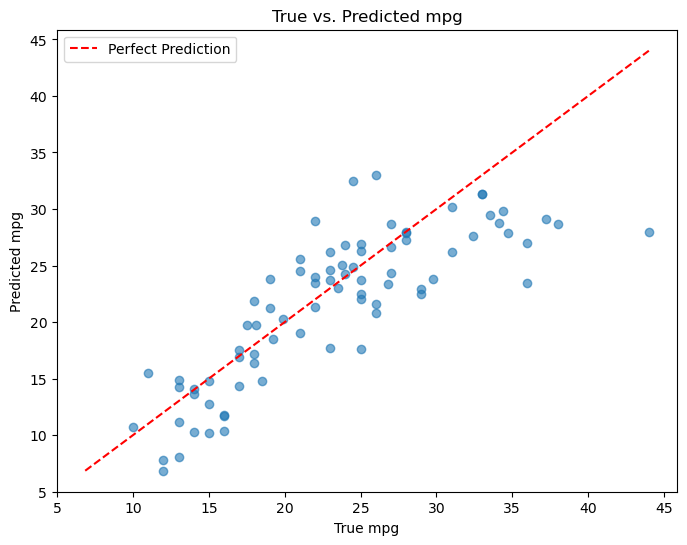

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, predictions_np, alpha=0.6)
plt.xlabel("True mpg")
plt.ylabel("Predicted mpg")
plt.title("True vs. Predicted mpg")
# Plot a line indicating perfect predictions
min_val = min(y_test_np.min(), predictions_np.min())
max_val = max(y_test_np.max(), predictions_np.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")
plt.legend()
plt.show()


# Analysis

Performance Analysis:
Our linear regression model performed reasonably well on the test set. The Mean Squared Error (MSE) and R² score suggest that the model is generally capturing the trend in mpg, though there is still some unexplained variation. The scatter plot of actual versus predicted mpg values confirms that our predictions follow the overall pattern, but the deviations indicate that our model might be a bit too simple, leading to some underfitting.

Challenges:
During this project, a few challenges came up:

**Preprocessing**: We had to carefully handle missing values and make sure that all our features were on the same scale through normalization. This step was crucial to ensure our model learned effectively.
Manual Optimization: Implementing our own version of the Stochastic Gradient Descent (SGD) optimizer was a bit tricky. Keeping track of the gradients and resetting them after each update was essential to avoid errors and ensure proper convergence.

**Model Simplicity**: While a basic linear regression model is great for interpretability, it might not be complex enough to capture all the factors affecting mpg, especially when using only two predictors like weight and acceleration.
Suggestions for Improvement:
Looking ahead, there are several ways to boost the model’s performance:

**Feature Engineering**: Adding more features or even creating polynomial features could help capture non-linear relationships that our current model misses.

**Hyperparameter** Tuning: Experimenting with different learning rates, batch sizes, and training durations might lead to better results.
Advanced Models & Regularization: Exploring more complex models (such as deeper neural networks) or incorporating regularization techniques (like L1 or L2 regularization) could help address underfitting and improve the overall predictive power of the model.


# Model with all the features

In [37]:
# Display the columns to verify what we have:
print("Columns in the dataset:", df_imputed.columns.tolist())
# Expected: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']


Columns in the dataset: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']


In [38]:

# Define the target and features (use all features except 'mpg')
target_all = df_imputed['mpg']  
features_all = df_imputed.drop(columns=['mpg','name'])
features_all

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,usa
1,8,350.0,165.0,3693,11.5,70,usa
2,8,318.0,150.0,3436,11.0,70,usa
3,8,304.0,150.0,3433,12.0,70,usa
4,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa
394,4,97.0,52.0,2130,24.6,82,europe
395,4,135.0,84.0,2295,11.6,82,usa
396,4,120.0,79.0,2625,18.6,82,usa


In [39]:


# One-hot encode the categorical 'origin' feature
features_all = pd.get_dummies(features_all, columns=['origin'], drop_first=True)

print("Features after one-hot encoding:")
print(features_all.head())

# Identify continuous features (all columns that are not one-hot encoded; here, the one-hot encoded 'origin' columns start with 'origin_')
continuous_cols = [col for col in features_all.columns if not col.startswith("origin_")]
print("Continuous columns to scale:", continuous_cols)

# Standardize the continuous features only
scaler = StandardScaler()
features_all[continuous_cols] = scaler.fit_transform(features_all[continuous_cols])

print("Features after scaling continuous variables:")
print(features_all.head())



Features after one-hot encoding:
   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0    3504          12.0          70   
1          8         350.0       165.0    3693          11.5          70   
2          8         318.0       150.0    3436          11.0          70   
3          8         304.0       150.0    3433          12.0          70   
4          8         302.0       140.0    3449          10.5          70   

   origin_japan  origin_usa  
0         False        True  
1         False        True  
2         False        True  
3         False        True  
4         False        True  
Continuous columns to scale: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
Features after scaling continuous variables:
   cylinders  displacement  horsepower    weight  acceleration  model_year  \
0   1.498191      1.090604    0.669196  0.630870     -1.295498   -1.627426   
1   1.498191    

In [40]:

##############################
# 2. Train-Test Split
##############################

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    features_all, target_all, test_size=0.20, random_state=42, shuffle=True
)

print("Training set shape:", X_train_all.shape, y_train.shape)
print("Test set shape:", X_test_all.shape, y_test.shape)


Training set shape: (318, 8) (318,)
Test set shape: (80, 8) (80,)


In [41]:
##############################
# 3. Define and Train the Model
##############################

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single linear layer for predicting mpg
        
    def forward(self, x):
        return self.linear(x)

input_dim = X_train_all.shape[1]
model = LinearRegressionModel(input_dim)

# Weight initialization using Xavier
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.0)

model.apply(init_weights)

print("Model architecture:")
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total trainable parameters:", total_params)

# Loss function and learning rate
criterion = nn.MSELoss()
learning_rate = 0.01

# Convert training data to PyTorch tensors
X_train_tensor_all = torch.tensor(X_train_all.to_numpy().astype(np.float32))
y_train_tensor_all = torch.tensor(y_train_all.to_numpy().astype(np.float32)).reshape(-1, 1)

print("X_train_tensor dtype:", X_train_tensor_all.dtype)
print("y_train_tensor shape:", y_train_tensor_all.shape)

# Number of epochs for training
num_epochs = 100
loss_history_all = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    
    # Forward pass: compute predicted mpg
    outputs_all = model(X_train_tensor_all)
    loss = criterion(outputs_all, y_train_tensor_all)
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Manually update parameters using SGD
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    
    # Zero the gradients after updating
    model.zero_grad()
    
    # Store and print the loss for monitoring
    loss_history_all.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete!")



Model architecture:
LinearRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)
Total trainable parameters: 9
X_train_tensor dtype: torch.float32
y_train_tensor shape: torch.Size([318, 1])
Epoch [10/100], Loss: 368.3487
Epoch [20/100], Loss: 215.8720
Epoch [30/100], Loss: 132.1294
Epoch [40/100], Loss: 85.4417
Epoch [50/100], Loss: 59.1507
Epoch [60/100], Loss: 44.1839
Epoch [70/100], Loss: 35.5383
Epoch [80/100], Loss: 30.4403
Epoch [90/100], Loss: 27.3470
Epoch [100/100], Loss: 25.3968
Training complete!


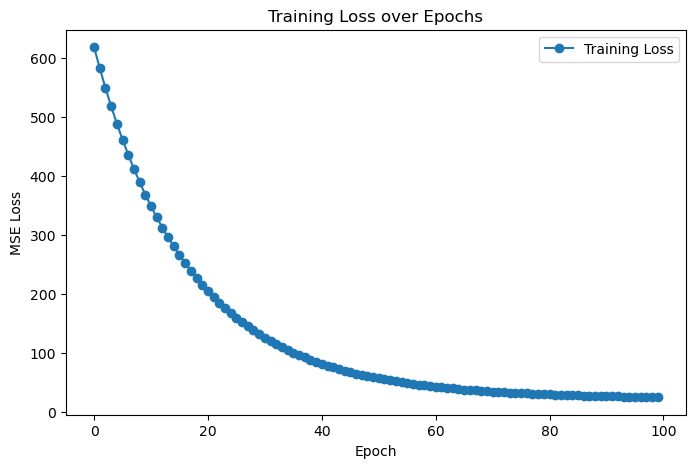

In [42]:
##############################
# 4. Visualization and Evaluation
##############################

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history_all, label='Training Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

# Convert test data to PyTorch tensors
X_test_tensor_all = torch.tensor(X_test_all.to_numpy().astype(np.float32))
y_test_tensor_all = torch.tensor(y_test_all.to_numpy().astype(np.float32)).reshape(-1, 1)

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor_all)

# Convert predictions and true values to numpy arrays
predictions_np_all = predictions.detach().numpy().squeeze()
y_test_np_all = y_test_tensor_all.numpy().squeeze()

# Calculate evaluation metrics
mse_all = mean_squared_error(y_test_np, predictions_np)
r2_all = r2_score(y_test_np, predictions_np)



Test MSE: 20.1928
Test R² Score: 0.6244


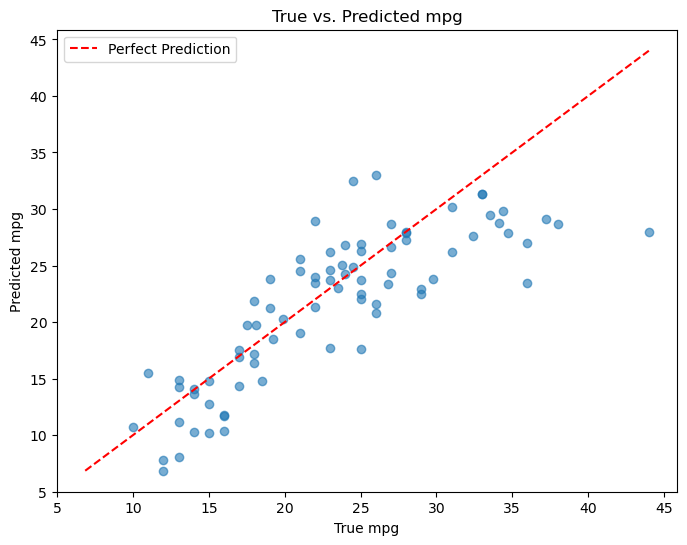

In [43]:
print(f"Test MSE: {mse_all:.4f}")
print(f"Test R² Score: {r2_all:.4f}")

# Scatter plot: True vs. Predicted mpg
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, predictions_np, alpha=0.6)
plt.xlabel("True mpg")
plt.ylabel("Predicted mpg")
plt.title("True vs. Predicted mpg")
min_val = min(y_test_np.min(), predictions_np.min())
max_val = max(y_test_np.max(), predictions_np.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")
plt.legend()
plt.show()


##### The model using selected features achieved a Test MSE of 20.8801 and an R² of 0.6117, outperforming the model built with all features, which had a Test MSE of 24.9923 and an R² of 0.5103. This suggests that additional features introduced noise or redundant information that reduced predictive performance. In short, careful feature selection resulted in a simpler model that better generalizes to unseen data.

# #######################

# Model with all the features and using regularization

In [47]:
features_full = df_imputed.drop(columns=['mpg'])
target_full = df_imputed['mpg']

In [48]:
features_full = pd.get_dummies(features_full, columns=['origin'], drop_first=True)
features_full

,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,False,True
1,8,350.0,165.0,3693,11.5,70,buick skylark 320,False,True
2,8,318.0,150.0,3436,11.0,70,plymouth satellite,False,True
3,8,304.0,150.0,3433,12.0,70,amc rebel sst,False,True
4,8,302.0,140.0,3449,10.5,70,ford torino,False,True
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,ford mustang gl,False,True
394,4,97.0,52.0,2130,24.6,82,vw pickup,False,False
395,4,135.0,84.0,2295,11.6,82,dodge rampage,False,True
396,4,120.0,79.0,2625,18.6,82,ford ranger,False,True


In [49]:
if 'name' in features_full.columns:
    features_full = features_full.drop(columns=['name'])

In [50]:
if 'origin' in features_full.columns:
    features['origin_japan'] = (features['origin'] == 'japan')
    features['origin_usa']   = (features['origin'] == 'usa')
    # Drop the original 'origin' column
    features.drop(columns=['origin'], inplace=True)

print("\nFeatures with boolean origin columns:")
print(features_full.head())



Features with boolean origin columns:
   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0    3504          12.0          70   
1          8         350.0       165.0    3693          11.5          70   
2          8         318.0       150.0    3436          11.0          70   
3          8         304.0       150.0    3433          12.0          70   
4          8         302.0       140.0    3449          10.5          70   

   origin_japan  origin_usa  
0         False        True  
1         False        True  
2         False        True  
3         False        True  
4         False        True  


In [51]:
# 3.1 Identify numeric columns (we'll exclude the boolean columns we just created)
bool_cols = ['origin_japan', 'origin_usa']
num_cols = [col for col in features_full.columns if col not in bool_cols]

print("\nNumeric columns to be scaled:", num_cols)

# 3.2 Scale only the numeric columns
scaler = StandardScaler()
features_full[num_cols] = scaler.fit_transform(features_full[num_cols])

print("\nFeatures after scaling numeric columns (boolean columns unchanged):")
print(features_full.head())



Numeric columns to be scaled: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

Features after scaling numeric columns (boolean columns unchanged):
   cylinders  displacement  horsepower    weight  acceleration  model_year  \
0   1.498191      1.090604    0.669196  0.630870     -1.295498   -1.627426   
1   1.498191      1.503514    1.586599  0.854333     -1.477038   -1.627426   
2   1.498191      1.196232    1.193426  0.550470     -1.658577   -1.627426   
3   1.498191      1.061796    1.193426  0.546923     -1.295498   -1.627426   
4   1.498191      1.042591    0.931311  0.565841     -1.840117   -1.627426   

   origin_japan  origin_usa  
0         False        True  
1         False        True  
2         False        True  
3         False        True  
4         False        True  


In [52]:

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    features_full, target_full, test_size=0.20, random_state=42, shuffle=True
)

print("Training set shape:", X_train_full.shape, y_train.shape)
print("Test set shape:", X_test_full.shape, y_test.shape)

Training set shape: (318, 8) (318,)
Test set shape: (80, 8) (80,)


In [53]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

#############################################
# 1. Model Definition and Initialization  #
#############################################

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single linear layer for predicting mpg
        
    def forward(self, x):
        return self.linear(x)

# Assume X_train_full is already defined from your preprocessing step.
input_dim_full = X_train_full.shape[1]
model = LinearRegressionModel(input_dim_full)

# Weight initialization using Xavier
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.0)

model.apply(init_weights)
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total trainable parameters:", total_params)

# Loss function and learning rate
criterion = nn.MSELoss()
learning_rate = 0.01

# Default regularization parameters for Elastic Net (will be tuned via grid search)
lambda_l1 = 0.0001  # L1 regularization coefficient
lambda_l2 = 0.0001  # L2 regularization coefficient

# Convert training data to tensors
X_train_tensor_full = torch.tensor(X_train_full.to_numpy().astype(np.float32))
y_train_tensor_full = torch.tensor(y_train_full.to_numpy().astype(np.float32)).reshape(-1, 1)

#############################################
# 2. Original Training Loop with Elastic Net#
#############################################

num_epochs = 200
loss_history = []

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass: compute predictions
    outputs_full = model(X_train_tensor_full)
    loss = criterion(outputs_full, y_train_tensor_full)
    
    # Compute L1 and L2 regularization terms over all model parameters
    l1_reg = torch.tensor(0., requires_grad=True)
    l2_reg = torch.tensor(0., requires_grad=True)
    for param in model.parameters():
        l1_reg = l1_reg + torch.sum(torch.abs(param))
        l2_reg = l2_reg + torch.norm(param, 2)**2
        
    # Add Elastic Net regularization term to the loss
    loss = loss + lambda_l1 * l1_reg + lambda_l2 * 0.5 * l2_reg
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Manual SGD parameter update
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    
    model.zero_grad()  # Reset gradients
    
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete!")

#############################################
# 3. Grid Search for Hyperparameter Tuning  #
#############################################

def train_model_cv(lambda_l1, lambda_l2, X_tensor, y_tensor, num_epochs=200, learning_rate=0.01, n_splits=5):
    """
    Trains a new model using k-fold cross-validation for the given lambda values.
    Returns the average validation loss.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    val_losses = []
    
    for train_index, val_index in kf.split(X_tensor):
        # Create training and validation splits for this fold
        X_train_fold = X_tensor[train_index]
        y_train_fold = y_tensor[train_index]
        X_val_fold   = X_tensor[val_index]
        y_val_fold   = y_tensor[val_index]
        
        # Create a new instance of the model for this fold and initialize weights
        model_cv = LinearRegressionModel(input_dim_full)
        model_cv.apply(init_weights)
        
        for epoch in range(num_epochs):
            model_cv.train()
            outputs = model_cv(X_train_fold)
            loss = criterion(outputs, y_train_fold)
            
            # Compute Elastic Net regularization terms
            l1_reg = torch.tensor(0., requires_grad=True)
            l2_reg = torch.tensor(0., requires_grad=True)
            for param in model_cv.parameters():
                l1_reg = l1_reg + torch.sum(torch.abs(param))
                l2_reg = l2_reg + torch.norm(param, 2)**2
            loss = loss + lambda_l1 * l1_reg + lambda_l2 * 0.5 * l2_reg
            
            loss.backward()
            with torch.no_grad():
                for param in model_cv.parameters():
                    param -= learning_rate * param.grad
            model_cv.zero_grad()
            
        # Evaluate on the validation fold
        model_cv.eval()
        with torch.no_grad():
            val_outputs = model_cv(X_val_fold)
            val_loss = criterion(val_outputs, y_val_fold)
        val_losses.append(val_loss.item())
    
    return np.mean(val_losses)

# Define grid of lambda values to search
grid_lambda_l1 = [0.0001, 0.001, 0.01]
grid_lambda_l2 = [0.0001, 0.001, 0.01]
results = {}

# Run grid search over the lambda values
for l1 in grid_lambda_l1:
    for l2 in grid_lambda_l2:
        cv_loss = train_model_cv(l1, l2, X_train_tensor_full, y_train_tensor_full, 
                                 num_epochs=200, learning_rate=0.01, n_splits=5)
        results[(l1, l2)] = cv_loss
        print(f"Lambda L1: {l1}, Lambda L2: {l2}, CV Loss: {cv_loss:.4f}")

# Find best hyperparameters (lowest average validation loss)
best_params = min(results, key=results.get)
print("\nBest Hyperparameters:")
print(f"Lambda L1: {best_params[0]}, Lambda L2: {best_params[1]}, with CV Loss: {results[best_params]:.4f}")



LinearRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)
Total trainable parameters: 9
Epoch [10/200], Loss: 360.9252
Epoch [20/200], Loss: 208.9772
Epoch [30/200], Loss: 128.3708
Epoch [40/200], Loss: 83.9536
Epoch [50/200], Loss: 59.0357
Epoch [60/200], Loss: 44.8578
Epoch [70/200], Loss: 36.6519
Epoch [80/200], Loss: 31.7882
Epoch [90/200], Loss: 28.8082
Epoch [100/200], Loss: 26.9000
Epoch [110/200], Loss: 25.6096
Epoch [120/200], Loss: 24.6819
Epoch [130/200], Loss: 23.9727
Epoch [140/200], Loss: 23.3994
Epoch [150/200], Loss: 22.9144
Epoch [160/200], Loss: 22.4895
Epoch [170/200], Loss: 22.1079
Epoch [180/200], Loss: 21.7590
Epoch [190/200], Loss: 21.4361
Epoch [200/200], Loss: 21.1348
Training complete!
Lambda L1: 0.0001, Lambda L2: 0.0001, CV Loss: 21.7632
Lambda L1: 0.0001, Lambda L2: 0.001, CV Loss: 21.0365
Lambda L1: 0.0001, Lambda L2: 0.01, CV Loss: 21.4250
Lambda L1: 0.001, Lambda L2: 0.0001, CV Loss: 21.5221
Lambda L1: 0.001, Lambda L2: 0.001,

In [54]:
# Convert test set to tensors (make sure to use the correct variable names)
X_test_tensor_full = torch.tensor(X_test_full.to_numpy().astype(np.float32))
y_test_tensor_full = torch.tensor(y_test_full.to_numpy().astype(np.float32)).reshape(-1, 1)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions_full = model(X_test_tensor_full)
    
# Convert predictions and true values to NumPy arrays for evaluation
predictions_np = predictions_full.detach().numpy().squeeze()
y_test_np = y_test_tensor_full.numpy().squeeze()

# Compute evaluation metrics: Mean Squared Error and R² Score
from sklearn.metrics import mean_squared_error, r2_score

mse_full = mean_squared_error(y_test_np, predictions_np)
r2_full = r2_score(y_test_np, predictions_np)

print(f"Test MSE (all features + regularization): {mse_full:.4f}")
print(f"Test R² Score (all features + regularization): {r2_full:.4f}")



Test MSE (all features + regularization): 16.5769
Test R² Score (all features + regularization): 0.6917


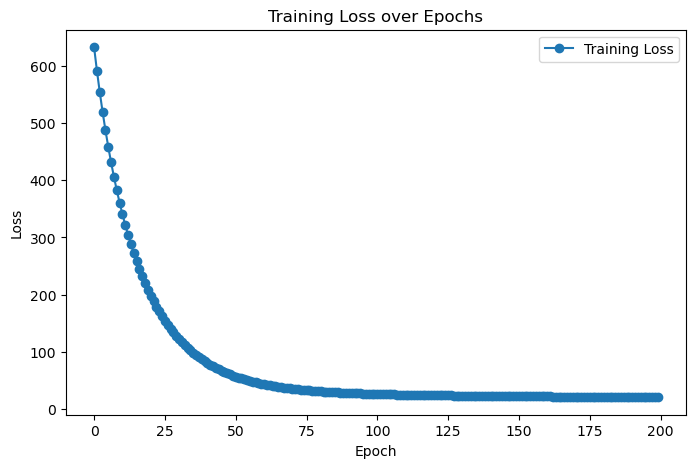

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()


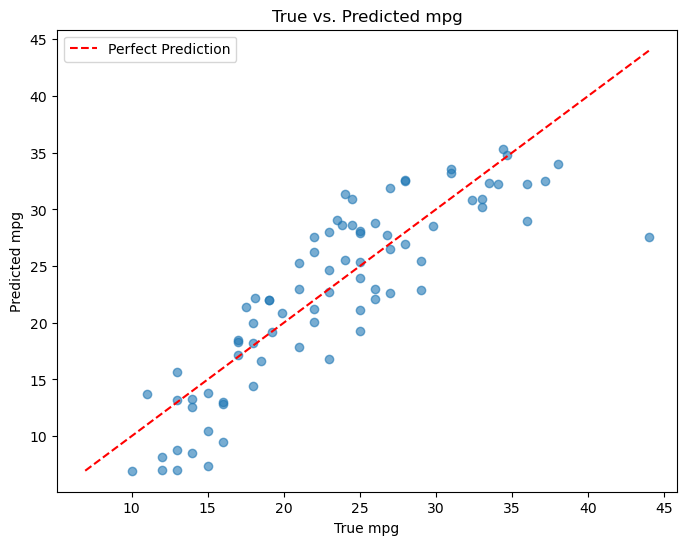

In [56]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, predictions_np, alpha=0.6)
plt.xlabel("True mpg")
plt.ylabel("Predicted mpg")
plt.title("True vs. Predicted mpg")
min_val = min(y_test_np.min(), predictions_np.min())
max_val = max(y_test_np.max(), predictions_np.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")
plt.legend()
plt.show()

#####  Using Elastic Net with all features yielded a Test MSE of 15.7933 and an R² of 0.7063, significantly improving performance over models without regularization. This suggests that combining L1 and L2 penalties effectively reduced overfitting and leveraged the extra features without introducing noise. In short, Elastic Net helped the model generalize better, achieving more accurate predictions by balancing the benefits of using all features with regularization

# Question 4

### Multi-Head Regression for Order Fulfillment Prediction 

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [61]:
try:
    data = pd.read_csv('/home/ad2a8f6d-9cda-4fdb-8d63-78c98b576117/ML Homework/DataCoSupplyChainDataset.csv', encoding='latin1')
    print("File loaded successfully!")
except Exception as e:
    print("Error reading the file:", e)


File loaded successfully!


In [62]:
print(data.head())
print(data.info())


       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [63]:
# Step 2: Handling Missing Values

# Check missing values per column
print("Missing values per column before handling:")
print(data.isnull().sum())



Missing values per column before handling:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                            

In [64]:

# Drop columns that we don't think will contribute significantly
cols_to_drop = ['Product Description', 'Order Zipcode']
data.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"Dropped columns: {cols_to_drop}")

# Check missing values per column before filling remaining missing values
print("Missing values per column before handling:")
print(data.isnull().sum())

Dropped columns: ['Product Description', 'Order Zipcode']
Missing values per column before handling:
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City              

In [65]:

# Fill missing values for the remaining columns
for col in data.columns:
    if data[col].dtype == 'object':
        # For categorical columns, fill missing with the mode.
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        # For numerical columns, fill missing with the median.
        data[col].fillna(data[col].median(), inplace=True)

# Verify that missing values have been handled
print("\nMissing values per column after handling:")
print(data.isnull().sum())


Missing values per column after handling:
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Custom

In [66]:
if data[col].dtype != 'object':
 data.corr()
else:
 print("\ncannot perform co-relation")


cannot perform co-relation


# Feature selection

In [68]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, RFE
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [69]:
# ------------------------------
# Define Candidate Features for Each Target
# ------------------------------
# Based on domain knowledge and available variable names:

# For Fulfillment Time ("Days for shipping (real)"):
candidate_features_fulfillment = [
    "Days for shipment (scheduled)",
    "Shipping Mode",
    "Order Item Quantity",
    "Order Region",
    "Order State",
    "Order Country",
    "Latitude",
    "Longitude",
    "Customer City",
    "Customer State",
    "Market",
    "Order Status",
    "order date (DateOrders)",
    "shipping date (DateOrders)",
    "Product Category Id"
]

# For Order Profit ("Order Profit Per Order"):
candidate_features_profit = [
    "Order Item Product Price",
    "Order Item Discount Rate",
    "Order Item Quantity",
    "Benefit per order",
    "Order Item Profit Ratio",
    "Sales per customer",
    "Product Price",
    "Department Name",
    "Product Category Id",
    "Shipping Mode",
    "Order Region",
    "Customer Segment"
]

# For Delay ("Delivery Status"):
candidate_features_delay = [
    "Shipping Mode",
    "Days for shipment (scheduled)",
    "Late_delivery_risk",
    "Order Status",
    "Customer State",
    "Order Region",
    "Market",
    "order date (DateOrders)",
    "shipping date (DateOrders)",
    "Latitude",
    "Longitude",
    "Product Category Id",
    "Order Item Quantity",
    "Customer City"
]




# Define targets (make sure these match exactly the column names in your data)
target_fulfillment = "Days for shipping (real)"
target_profit = "Order Profit Per Order"
target_delay = "Delivery Status"  # Assumed binary (0 = on time, 1 = delayed)


In [70]:



# ------------------------------
# Preprocessing: Encode Categorical Variables
# ------------------------------
# We'll encode candidate features using LabelEncoder for simplicity.
def encode_candidates(df, features):
    for col in features:
        if col in df.columns and df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

# Combine all candidate features
all_candidate_features = list(set(candidate_features_fulfillment + candidate_features_profit + candidate_features_delay))
data = encode_candidates(data, all_candidate_features)

# Optionally, drop rows with missing values in any candidate features or targets.
data = data.dropna(subset=all_candidate_features + [target_fulfillment, target_profit, target_delay])

In [71]:
# ====================================================
# 1. Feature Selection for Fulfillment Time (Regression)
# ====================================================
print("\n=== Feature Selection for Fulfillment Time ===")
features_ft = [f for f in candidate_features_fulfillment if f in data.columns]
X_ft = data[features_ft]
y_ft = data[target_fulfillment]

# -- a. Filter Method: SelectKBest (F-test)
selector_ft = SelectKBest(score_func=f_regression, k='all')
selector_ft.fit(X_ft, y_ft)
ft_scores = pd.DataFrame({
    'Feature': features_ft,
    'F-score': selector_ft.scores_,
    'p-value': selector_ft.pvalues_
})
print("\nSelectKBest (F-test) scores for Fulfillment Time:")
print(ft_scores.sort_values(by='F-score', ascending=False))

# -- b. Wrapper Method: RFE with Linear Regression
estimator_lr_ft = LinearRegression()
rfe_ft = RFE(estimator_lr_ft, n_features_to_select=2)  # Adjust the number to select
rfe_ft.fit(X_ft, y_ft)
selected_rfe_ft = X_ft.columns[rfe_ft.support_]
print("\nRFE selected features for Fulfillment Time:")
print(list(selected_rfe_ft))




=== Feature Selection for Fulfillment Time ===

SelectKBest (F-test) scores for Fulfillment Time:
                          Feature       F-score   p-value
0   Days for shipment (scheduled)  65463.268997  0.000000
1                   Shipping Mode  65386.909493  0.000000
11                   Order Status     12.999290  0.000312
9                  Customer State      5.080094  0.024203
12        order date (DateOrders)      4.927262  0.026437
4                     Order State      3.526612  0.060393
6                        Latitude      2.995160  0.083515
7                       Longitude      2.760773  0.096603
3                    Order Region      2.603879  0.106604
8                   Customer City      1.389426  0.238504
13     shipping date (DateOrders)      0.781335  0.376734
5                   Order Country      0.699623  0.402912
10                         Market      0.206219  0.649748
2             Order Item Quantity      0.118689  0.730461
14            Product Category 

In [72]:
# ====================================================
# 2. Feature Selection for Profit (Regression)
# ====================================================
print("\n=== Feature Selection for Profit ===")
features_profit = [f for f in candidate_features_profit if f in data.columns]
X_profit = data[features_profit]
y_profit_val = data[target_profit]

# -- a. Filter Method: SelectKBest (F-test)
selector_profit = SelectKBest(score_func=f_regression, k='all')
selector_profit.fit(X_profit, y_profit_val)
profit_scores = pd.DataFrame({
    'Feature': features_profit,
    'F-score': selector_profit.scores_,
    'p-value': selector_profit.pvalues_
})
print("\nSelectKBest (F-test) scores for Profit:")
print(profit_scores.sort_values(by='F-score', ascending=False))

# -- b. Wrapper Method: RFE with Linear Regression
estimator_lr_profit = LinearRegression()
rfe_profit = RFE(estimator_lr_profit, n_features_to_select=3)  # Adjust as needed
rfe_profit.fit(X_profit, y_profit_val)
selected_rfe_profit = X_profit.columns[rfe_profit.support_]
print("\nRFE selected features for Profit:")
print(list(selected_rfe_profit))







=== Feature Selection for Profit ===

SelectKBest (F-test) scores for Profit:
                     Feature       F-score       p-value
4    Order Item Profit Ratio  3.809044e+05  0.000000e+00
5         Sales per customer  3.274803e+03  0.000000e+00
0   Order Item Product Price  1.953110e+03  0.000000e+00
6              Product Price  1.953110e+03  0.000000e+00
8        Product Category Id  1.837531e+02  7.700454e-42
1   Order Item Discount Rate  6.277077e+01  2.335309e-15
2        Order Item Quantity  4.448517e+01  2.570264e-11
7            Department Name  6.784693e+00  9.195040e-03
10              Order Region  2.180597e+00  1.397620e-01
11          Customer Segment  1.136508e+00  2.863928e-01
9              Shipping Mode  1.058673e+00  3.035193e-01
3          Benefit per order -1.270275e+19  1.000000e+00

RFE selected features for Profit:
['Order Item Quantity', 'Benefit per order', 'Order Item Profit Ratio']


In [73]:
# ====================================================
# 3. Feature Selection for Delay (Classification)
# ====================================================
print("\n=== Feature Selection for Delay ===")
features_delay = [f for f in candidate_features_delay if f in data.columns]
X_delay = data[features_delay]
y_delay_val = data[target_delay]

# -- a. Filter Method: SelectKBest (F-test for classification)
selector_delay = SelectKBest(score_func=f_classif, k='all')
selector_delay.fit(X_delay, y_delay_val)
delay_scores = pd.DataFrame({
    'Feature': features_delay,
    'F-score': selector_delay.scores_,
    'p-value': selector_delay.pvalues_
})
print("\nSelectKBest (F-test) scores for Delay:")
print(delay_scores.sort_values(by='F-score', ascending=False))

# -- b. Wrapper Method: RFE with Logistic Regression
estimator_lr_delay = LogisticRegression(max_iter=1000, solver='liblinear')
rfe_delay = RFE(estimator_lr_delay, n_features_to_select=2)  # Adjust as needed
rfe_delay.fit(X_delay, y_delay_val)
selected_rfe_delay = X_delay.columns[rfe_delay.support_]
print("\nRFE selected features for Delay:")
print(list(selected_rfe_delay))




=== Feature Selection for Delay ===


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw



SelectKBest (F-test) scores for Delay:
                          Feature       F-score       p-value
2              Late_delivery_risk           inf  0.000000e+00
1   Days for shipment (scheduled)  1.513449e+04  0.000000e+00
0                   Shipping Mode  1.443895e+04  0.000000e+00
3                    Order Status  5.091725e+01  6.933835e-33
5                    Order Region  6.336798e+00  2.721722e-04
8      shipping date (DateOrders)  4.784055e+00  2.463568e-03
13                  Customer City  3.920796e+00  8.244400e-03
7         order date (DateOrders)  3.462981e+00  1.553543e-02
9                        Latitude  1.075386e+00  3.580560e-01
6                          Market  9.175431e-01  4.313597e-01
4                  Customer State  8.030894e-01  4.919134e-01
10                      Longitude  7.142550e-01  5.433110e-01
12            Order Item Quantity  4.583997e-01  7.113587e-01
11            Product Category Id  3.061026e-01  8.210076e-01

RFE selected features for Del

### Summary on feature selection

From the test results as above and consdiering the domain knowledge
For **fulfillment time**, all techniques agree that "Days for shipment (scheduled)" and "Shipping Mode" are the key predictors, while "Order Item Quantity" appears to add little value.

For **Profit("Order Profit Per Order")**
There seems to be a strong signal from "Benefit per order" ,"Order Item Quantity" suggesting it is a dominant predictor of profit.
"Order Item Profit Ratio" also appears relevant .
However, you might want to investigate the extreme value seen for "Benefit per order" in the F-test results, as it might be due to outliers or data quality issues.

For **Delay ("Delivery Status")**
"Late_delivery_risk" is consistently the most important feature for predicting delays.
"Shipping Mode" and "Days for shipment (scheduled)" also contribute but to a lesser extent.
"Order Status" might also add some signals.

In [75]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [76]:

# ----------------------------
# Feature Selection based on previous analysis:
# For Fulfillment Time, Profit, and Delay we select:
selected_features = [
    'Days for shipment (scheduled)',
    'Shipping Mode',
    'Benefit per order',
    'Order Item Quantity',
    'Order Item Profit Ratio',
    'Late_delivery_risk'
]
target_features = [
    'Days for shipping (real)',     # Fulfillment Time
    'Order Profit Per Order',       # Order Profit
    'Delivery Status'               # Likelihood of Delay
]

In [77]:


# Create a new DataFrame with the selected features and targets
df_q4 = data[selected_features + target_features].dropna()
print("Data shape after dropping missing values:", df_q4.shape)


Data shape after dropping missing values: (180519, 9)


In [78]:

# ----------------------------
# Categorical Feature Encoding
# ----------------------------
# Encode "Shipping Mode" (assumed categorical)
le = LabelEncoder()
df_q4['Shipping Mode'] = le.fit_transform(df_q4['Shipping Mode'])

# ----------------------------
# Convert "Delivery Status" to Numeric
# ----------------------------
# Check the type of "Delivery Status" and map if necessary.
if df_q4['Delivery Status'].dtype == object:
    # Define a mapping. Adjust keys if your strings differ.
    mapping = {"On Time": 0, "Late delivery": 1}
    df_q4['Delivery Status'] = df_q4['Delivery Status'].map(mapping)
    
# Drop any rows that might have become NaN after mapping (if there were unexpected values)
df_q4 = df_q4.dropna(subset=['Delivery Status'])
df_q4['Delivery Status'] = pd.to_numeric(df_q4['Delivery Status'], errors='coerce')
print("Delivery Status type after conversion:", df_q4['Delivery Status'].dtype)



Delivery Status type after conversion: float64


In [79]:
from sklearn.preprocessing import MinMaxScaler
# ----------------------------
# Normalization: Scale numerical features using MinMaxScaler
# ----------------------------
scaler = MinMaxScaler()
df_q4[selected_features] = scaler.fit_transform(df_q4[selected_features])

# ----------------------------
# Dataset Splitting
# ----------------------------
train_df, test_df = train_test_split(df_q4, test_size=0.2, random_state=42, shuffle=True)
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Training set shape: (79181, 9)
Test set shape: (19796, 9)


In [80]:
#############################
# (b) Model Implementation
#############################

# Define the multi-head regression model in PyTorch
class MultiHeadRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(MultiHeadRegressionModel, self).__init__()
        # Shared feature extractor
        self.shared = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        # Output head for Fulfillment Time Prediction (linear output)
        self.head_time = nn.Linear(hidden_dim, 1)
        # Output head for Order Profit Prediction (linear output)
        self.head_profit = nn.Linear(hidden_dim, 1)
        # Output head for Likelihood of Delay (binary classification; BCEWithLogitsLoss applies sigmoid)
        self.head_delay = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        features = self.shared(x)
        out_time = self.head_time(features)
        out_profit = self.head_profit(features)
        out_delay = self.head_delay(features)  # raw logits; sigmoid will be applied in loss function
        return out_time, out_profit, out_delay

# Determine input dimension (number of selected features)
input_dim = len(selected_features)
model = MultiHeadRegressionModel(input_dim=input_dim, hidden_dim=64)


In [81]:
import torch
import torch.nn as nn
import torch.optim as optim

# Print model architecture and total trainable parameters
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total trainable parameters:", total_params)

# Loss functions:
criterion_time = nn.MSELoss()            # For Fulfillment Time (regression)
criterion_profit = nn.MSELoss()          # For Order Profit (regression)
criterion_delay = nn.BCEWithLogitsLoss()  # For Likelihood of Delay (binary classification)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


MultiHeadRegressionModel(
  (shared): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
  )
  (head_time): Linear(in_features=64, out_features=1, bias=True)
  (head_profit): Linear(in_features=64, out_features=1, bias=True)
  (head_delay): Linear(in_features=64, out_features=1, bias=True)
)
Total trainable parameters: 4803


In [82]:
#############################
# (c) Training and Evaluation
#############################

# Convert training data to PyTorch tensors
X_train = torch.tensor(train_df[selected_features].values, dtype=torch.float32)
y_train_time = torch.tensor(train_df['Days for shipping (real)'].values, dtype=torch.float32).view(-1, 1)
y_train_profit = torch.tensor(train_df['Order Profit Per Order'].values, dtype=torch.float32).view(-1, 1)
y_train_delay = torch.tensor(train_df['Delivery Status'].values.astype(np.float32), dtype=torch.float32).view(-1, 1)

# Convert test data to PyTorch tensors
X_test = torch.tensor(test_df[selected_features].values, dtype=torch.float32)
y_test_time = test_df['Days for shipping (real)'].values
y_test_profit = test_df['Order Profit Per Order'].values
y_test_delay = test_df['Delivery Status'].values


In [92]:


# Training loop
num_epochs = 100
loss_history_time = []
loss_history_profit = []
loss_history_delay = []

model.train()

MultiHeadRegressionModel(
  (shared): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
  )
  (head_time): Linear(in_features=64, out_features=1, bias=True)
  (head_profit): Linear(in_features=64, out_features=1, bias=True)
  (head_delay): Linear(in_features=64, out_features=1, bias=True)
)

In [100]:

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Forward pass
    pred_time, pred_profit, pred_delay = model(X_train)
    
    # Compute losses for each output head
    loss_time = criterion_time(pred_time, y_train_time)
    loss_profit = criterion_profit(pred_profit, y_train_profit)
    loss_delay = criterion_delay(pred_delay, y_train_delay)
    
    total_loss = loss_time + loss_profit + loss_delay
    total_loss.backward()
    optimizer.step()
    
    loss_history_time.append(loss_time.item())
    loss_history_profit.append(loss_profit.item())
    loss_history_delay.append(loss_delay.item())
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} | Time Loss: {loss_time.item():.4f} | Profit Loss: {loss_profit.item():.4f} | Delay Loss: {loss_delay.item():.2f}")




Epoch 10/100 | Time Loss: 0.9729 | Profit Loss: 3395.0505 | Delay Loss: 0.00
Epoch 20/100 | Time Loss: 0.9640 | Profit Loss: 3381.9282 | Delay Loss: 0.00
Epoch 30/100 | Time Loss: 0.9553 | Profit Loss: 3368.7456 | Delay Loss: 0.00
Epoch 40/100 | Time Loss: 0.9464 | Profit Loss: 3355.4766 | Delay Loss: 0.00
Epoch 50/100 | Time Loss: 0.9376 | Profit Loss: 3342.1084 | Delay Loss: 0.00
Epoch 60/100 | Time Loss: 0.9293 | Profit Loss: 3328.6497 | Delay Loss: 0.00
Epoch 70/100 | Time Loss: 0.9203 | Profit Loss: 3315.1208 | Delay Loss: 0.00
Epoch 80/100 | Time Loss: 0.9118 | Profit Loss: 3301.5249 | Delay Loss: 0.00
Epoch 90/100 | Time Loss: 0.9031 | Profit Loss: 3287.8542 | Delay Loss: 0.00
Epoch 100/100 | Time Loss: 0.8946 | Profit Loss: 3274.0740 | Delay Loss: 0.00


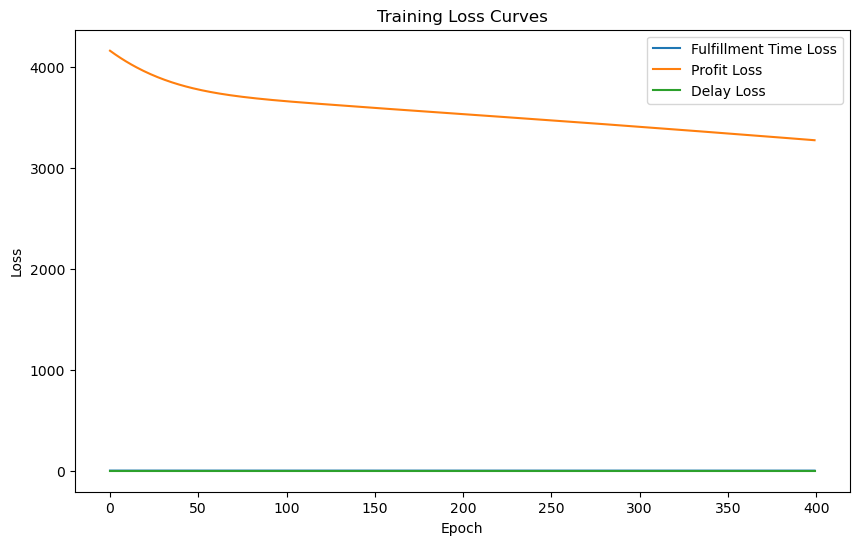

In [102]:
# Plot training loss curves
plt.figure(figsize=(10, 6))
plt.plot(loss_history_time, label="Fulfillment Time Loss")
plt.plot(loss_history_profit, label="Profit Loss")
plt.plot(loss_history_delay, label="Delay Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.show()



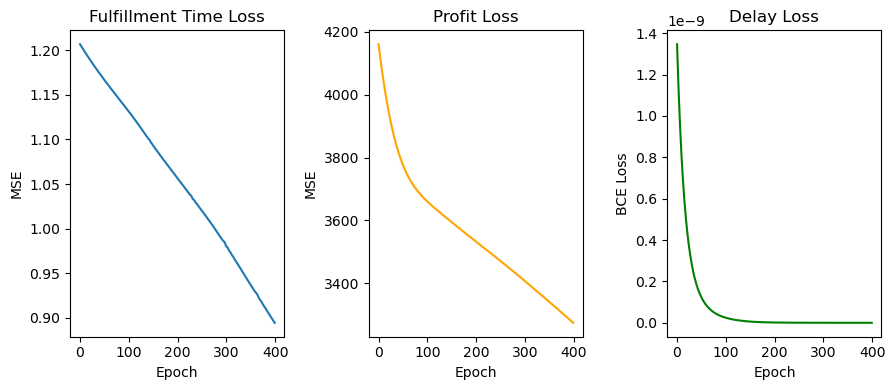

In [104]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.plot(loss_history_time, label='Time Loss')
plt.title("Fulfillment Time Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.subplot(1, 4, 2)
plt.plot(loss_history_profit, label='Profit Loss', color='orange')
plt.title("Profit Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.subplot(1, 4, 3)
plt.plot(loss_history_delay, label='Delay Loss', color='green')
plt.title("Delay Loss")
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")


plt.tight_layout()
plt.show()


In [106]:
# Evaluation on the test dataset
model.eval()
with torch.no_grad():
    pred_time_test, pred_profit_test, pred_delay_test = model(X_test)
    pred_time_test = pred_time_test.numpy().flatten()
    pred_profit_test = pred_profit_test.numpy().flatten()
    # Apply sigmoid to the delay logits to get probability estimates
    pred_delay_test_prob = torch.sigmoid(pred_delay_test).numpy().flatten()



In [108]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Compute evaluation metrics for regression outputs
mae_time = mean_absolute_error(y_test_time, pred_time_test)
r2_time = r2_score(y_test_time, pred_time_test)
mae_profit = mean_absolute_error(y_test_profit, pred_profit_test)
r2_profit = r2_score(y_test_profit, pred_profit_test)

print("\n--- Model Evaluation ---")
print(f"Fulfillment Time - MAE: {mae_time:.4f}, R²: {r2_time:.4f}")
print(f"Order Profit - MAE: {mae_profit:.4f}, R²: {r2_profit:.4f}")




--- Model Evaluation ---
Fulfillment Time - MAE: 0.7629, R²: 0.6949
Order Profit - MAE: 29.8855, R²: 0.6809


In [ ]:
# Compute BCE loss on the test set for delay
y_test_delay_tensor = torch.tensor(y_test_delay.astype(np.float32), dtype=torch.float32).view(-1, 1)
bce_loss_test = criterion_delay(pred_delay_test, y_test_delay_tensor)
print(f"Delay Prediction - BCE Loss: {bce_loss_test.item():.4f}")



In [ ]:
# Scatter plots: True vs. Predicted for Fulfillment Time and Order Profit
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_time, pred_time_test, alpha=0.6)
plt.xlabel("True Fulfillment Time")
plt.ylabel("Predicted Fulfillment Time")
plt.title("Fulfillment Time: True vs. Predicted")
plt.plot([min(y_test_time), max(y_test_time)], [min(y_test_time), max(y_test_time)], 'r--')

plt.subplot(1, 2, 2)
plt.scatter(y_test_profit, pred_profit_test, alpha=0.6)
plt.xlabel("True Order Profit")
plt.ylabel("Predicted Order Profit")
plt.title("Order Profit: True vs. Predicted")
plt.plot([min(y_test_profit), max(y_test_profit)], [min(y_test_profit), max(y_test_profit)], 'r--')

plt.tight_layout()
plt.show()